# 1-2 Data Preprocessing

In [ ]:
keyword = pd.DataFrame()
for i in tqdm(range(len(data_words_bigrams_old))):
    k = pd.DataFrame()
    k['keyword'] = data_words_bigrams_old[i]
    k['patent'] = pat_old['patent_id'][i]
    keyword = keyword.append(k)


In [1]:
import pandas as pd

In [5]:
de = pd.read_csv('exp_de.csv')
de['title'] = de['title'].apply(lambda x: x.lower())
de.tail(2)

,name,title,company,date_range,location,description
4756,hemanthbm,data engineer,CrowdANALYTIX,Dec 2015 – Aug 2016,Bangalore,i. Text Mining / Automated Product Cataloging ...
4757,hemanthbm,software engineer,Just Dial Limited,Jul 2014 – Dec 2015,"Mumbai Area, India",DevOps / Web-crawling / ETL:i. Developed over ...


In [92]:
de = de[de['title'].str.contains("data engineer|data analyst|data scientist")].reset_index(drop = True)
de.tail(3)

,name,title,company,date_range,location,description
1043,hemanthbm,data engineer,Walmart Labs,Jan 2019 – Present,NaN,Building/Optimizing the warehousing and report...
1044,hemanthbm,data engineer,VideoAmp,Jun 2018 – Jan 2019,"Santa Monica, California",Bringing simplicity to complex Adtech data on ...
1045,hemanthbm,data engineer,CrowdANALYTIX,Dec 2015 – Aug 2016,Bangalore,i. Text Mining / Automated Product Cataloging ...


## Bigram

In [150]:
import re
def pre_process(x):
    x = re.sub('[-*○•●]\s|-|·|▼|•\t|●\t|\uf0b7|•|\x95|\n\n    \n…\n\n        see more$', '', x)
    x = x.replace("\n", "")
    return x

de['description'] = de['description'].apply(lambda x: re.sub('[^a-zA-Z0-9 \n\.]|[0-9\.]|[0-9\)]', '', x)) # subset only words and numbers
 
                                                                                
                                            

In [151]:
# check if all special characters are excluded
import random
r = random.randint(0, len(de))
print(r)
de['description'][418]


767


'Data Science  ETL   ELT Data Architecture  DBA  Data Visualization  Data Engineer From Data source to Data VisualizationMain languages Java Python Scala  ClojureSuccessful Projects Large scale web crawling Web applications for Tableau dashboard Natural language processing on social media dataAmazon  Bestbuy Twitter  FacebookFailed Projects I grew a DSLDomain Specific Language for finance applications in Scala     Making the BABusiness Analysts write code was one of the primary aim of this project Patent analytics to create more innovative ideas while earning the right to keep themInspired by the Wright brothersApplied learning Mastered EnterpriseData governance techniques Data stewardship Master data managementTraditional and Social'

In [152]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# word cloud
from wordcloud import WordCloud

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [155]:
from stop_words import get_stop_words
from nltk.corpus import stopwords

stop_words = list(get_stop_words('en'))         #About 900 stopwords
nltk_words = list(stopwords.words('english')) #About 150 stopwords
stop_words.extend(nltk_words)


In [157]:
# tokenize words
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

description = de['description'].to_list()
data_words = list(sent_to_words(description))

In [198]:
'''
lower the min_count and threshold to let more bigram to emerge
better to just do bigram only, coz bigram is by default less common.
'''
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=10) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=10)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [199]:
print(trigram_mod[bigram_mod[data_words[4]]])

['data', 'analysis', 'using', 'and', 'tableau', 'on', 'industrial', 'internet', 'dataon', 'poc', 'systems', 'developed', 'pig_hive', 'and', 'impala', 'scripts', 'for', 'etl', 'and', 'analysis', 'for', 'hadoop', 'system', 'wrote', 'mapreduce', 'methods', 'in', 'java', 'and', 'python_scripts', 'tutored', 'college', 'and', 'high', 'scool', 'students', 'in', 'math', 'and', 'science', 'subjects', 'included', 'multivariable', 'calculus', 'statistics', 'physics', 'and', 'chemistry']


In [200]:
for bigram in trigram_mod.phrasegrams.keys():
    print(bigram)


(b'work', b'with')
(b'apache', b'spark')
(b'real', b'time')
(b'big', b'data')
(b'as', b'part')
(b'as', b'part_of')
(b'as_part', b'of')
(b'engineering', b'team')
(b'data_engineering', b'team')
(b'data', b'science')
(b'and_data', b'science')
(b'data', b'science_team')
(b'data_science', b'team')
(b'end', b'users')
(b'data', b'warehouse')
(b'data', b'pipelines')
(b'data', b'pipeline')
(b'ad', b'hoc')
(b'star', b'schema')
(b'understanding', b'of')
(b'data', b'ingestion')
(b'using', b'python')
(b'aws', b'kinesis')
(b'data', b'sets')
(b'data', b'sets_and')
(b'responsible', b'for')
(b'to', b'identify')
(b'to', b'identify_and')
(b'to', b'be')
(b'rd', b'party')
(b'pig', b'hive')
(b'python', b'scripts')
(b'communicate', b'with')
(b'working', b'with')
(b'as', b'well')
(b'front', b'end')
(b'such', b'as')
(b'daily', b'basis')
(b'on', b'daily_basis')
(b'on_daily', b'basis')
(b'etl', b'jobs')
(b'logistic', b'regression')
(b'crossfunctional', b'teams')
(b'best', b'practices')
(b'set', b'of')
(b'machine

In [169]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags = []):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        if allowed_postags != []:
            texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        else: 
            texts_out.append([token.lemma_ for token in doc])
    return texts_out

In [201]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_trigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv, and proper noun
data_lemmatized = lemmatization(data_words_bigrams)

# delete stop words again 
data_lemmatized = remove_stopwords(data_words)
print(data_lemmatized[:1])

[['work', 'meredith', 'core', 'profile', 'team', 'processing', 'company', 'client', 'dataskills', 'involved', 'aws', 'nodejs', 'serverless', 'framework', 'lambda', 'sqs', 'api', 'databricks', 'apache', 'spark', 'python', 'scala', 'kinesis']]


In [202]:
bigram_token = []
for sent in data_lemmatized:
    bigram_token.append(bigram_mod[sent])

#make dictionary of bigram token 
bigram_dict = gensim.corpora.Dictionary(bigram_token)

id2word_bigram = corpora.Dictionary(data_lemmatized)

#convert the word into vector, and use tfidf model from gensim 
bigram_corpus = [id2word_bigram.doc2bow(text) for text in bigram_token]

tfidf_bigrammodel = gensim.models.TfidfModel(bigram_corpus)

In [203]:
#print the bigrams with their frequencies
[[(id2word_bigram[id], freq) for id, freq in cp] for cp in bigram_corpus[:1]] 

[[('api', 1),
  ('aws', 1),
  ('client', 1),
  ('company', 1),
  ('core', 1),
  ('databricks', 1),
  ('dataskills', 1),
  ('framework', 1),
  ('involved', 1),
  ('kinesis', 1),
  ('lambda', 1),
  ('meredith', 1),
  ('nodejs', 1),
  ('processing', 1),
  ('profile', 1),
  ('python', 1),
  ('scala', 1),
  ('serverless', 1),
  ('sqs', 1),
  ('team', 1),
  ('work', 1)]]

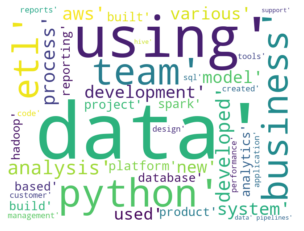

In [204]:
words = ' '.join([str(token) for token in bigram_token]) 

wc2= WordCloud(
        background_color="white",
        max_words=40,
        width = 800,
        height = 600,
        stopwords=stop_words
    ).generate(words)

plt.figure()
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.show()

From Bigram, we can see data engineer work is highly related to python, spark, ETL process, SQL, pipeline

In [218]:
flatten_data_words_bigrams = [val for sublist in data_words_bigrams for val in sublist]

In [217]:
# five most common tokens
from collections import Counter
word_freq = Counter(flatten_data_words_bigrams)
common_words = word_freq.most_common(20)
common_words


[('data', 2590),
 ('using', 939),
 ('python', 379),
 ('analysis', 312),
 ('team', 296),
 ('business', 285),
 ('developed', 262),
 ('etl', 253),
 ('spark', 243),
 ('analytics', 230),
 ('development', 225),
 ('process', 223),
 ('system', 216),
 ('sql', 216),
 ('aws', 215),
 ('design', 206),
 ('model', 188),
 ('various', 187),
 ('new', 181),
 ('built', 181)]

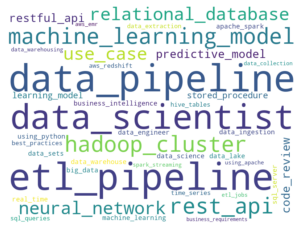

In [231]:
key_freq = pd.DataFrame(dict(word_freq).items(), columns = ['keyword', 'count'])
bi_key_freq = key_freq[key_freq['keyword'].str.contains('_')].sort_values(by = 'count', ascending = False)

bi_words = ' '.join(list(bi_key_freq['keyword'])) 

wc2= WordCloud(
        background_color="white",
        max_words=40,
        width = 800,
        height = 600,
        stopwords=stop_words
    ).generate(bi_words)

plt.figure()
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.show()

Data pipeline, hadoop cluster, relational database, ETL pipeline, neural network, Machine Learning Model are all frequency word in Data Engineer resume

## Frequently use Verb for Data Engineer

In [232]:
verb_lemmatized = lemmatization(data_words_bigrams, allowed_postags = ['VERB'])


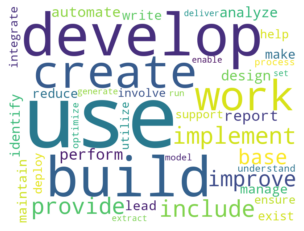

In [235]:
bi_verb = ' '.join([val for sublist in verb_lemmatized for val in sublist]) 

wc2= WordCloud(
        background_color="white",
        max_words=40,
        width = 800,
        height = 600,
        stopwords=stop_words
    ).generate(bi_verb)

plt.figure()
plt.imshow(wc2, interpolation="bilinear")
plt.axis("off")
plt.show()

In [245]:
from collections import Counter
verb = [val for sublist in verb_lemmatized for val in sublist]
counts = Counter(verb)
pd.DataFrame(dict(counts).items(), columns = ['verb', 'count']).sort_values(by = ['count'], ascending = False).head(20)


,verb,count
6,use,1153
41,develop,436
4,build,345
31,create,296
0,work,235
110,implement,203
44,include,176
170,provide,173
70,design,167
173,improve,166
